In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset
dataset = pd.read_csv("wdbc.data", sep=",").values

# Forming a data frame 
attributes = ["ID","Diagnosis","mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness","mean_compactness","mean_concavity","mean_concave_points","mean_symmetry","mean_fractal_dimension","se_radius","se_texture","se_perimeter","se_area","se_smoothness","se_compactness","se_concavity","se_concave_points","se_symmetry","se_fractal_dimension",
            "worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness","worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"]
data = pd.DataFrame(data=dataset,columns=attributes)
data.set_index("ID", inplace=True)

# Displaying the diagnosis(M = malignant, B = benign) and the 30 real-valued attributes
display(data.head())

,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
ID,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244


In [2]:
# Label-1 indicates malignant and Label-0 indicates benign 
data["Diagnosis"] = data["Diagnosis"].replace("M",1)
data["Diagnosis"] = data["Diagnosis"].replace("B",0)
data = data.apply(pd.to_numeric, errors="ignore")

# X contains only the first 10 features i.e only the mean values of the attributes not their standard error or maximum values

# Mean
X1 = dataset[:,2:12]
X1 = X1.astype("float64")
X1 = np.concatenate([np.ones((X1.shape[0],1)),X1],axis=1)

# Standard error
X2 = dataset[:,12:22]
X2 = X2.astype("float64")
X2 = np.concatenate([np.ones((X2.shape[0],1)),X2],axis=1)

# Maximum
X3 = dataset[:,22:32]
X3 = X3.astype("float64")
X3 = np.concatenate([np.ones((X3.shape[0],1)),X3],axis=1)

# Mean and Standard error
X4 = dataset[:,2:22]
X4 = X4.astype("float64")
X4 = np.concatenate([np.ones((X4.shape[0],1)),X4],axis=1)

# Standard error and Maximum
X5 = dataset[:,12:]
X5 = X5.astype("float64")
X5 = np.concatenate([np.ones((X5.shape[0],1)),X5],axis=1)

# Mean and Maximum
X6 = np.concatenate([X1,X3],axis=1)
X6 = X6.astype("float64")
X6 = np.concatenate([np.ones((X6.shape[0],1)),X6],axis=1)

# Mean, Standard error and Maximum
X7 = dataset[:,2:]
X7 = X7.astype("float64")
X7 = np.concatenate([np.ones((X7.shape[0],1)),X7],axis=1)


labels = data["Diagnosis"].values.reshape(-1,1)
data.drop("Diagnosis", axis = 1, inplace = True)
final_data1 = np.concatenate([X1,labels],axis=1)
final_data2 = np.concatenate([X2,labels],axis=1)
final_data3 = np.concatenate([X3,labels],axis=1)
final_data4 = np.concatenate([X4,labels],axis=1)
final_data5 = np.concatenate([X5,labels],axis=1)
final_data6 = np.concatenate([X6,labels],axis=1)
final_data7 = np.concatenate([X7,labels],axis=1)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


def evaluate(final_data):
    report = np.empty([5, 6]) #row, column
    m,n = final_data.shape
    for i in range(5):
        np.random.seed(0)
        np.random.shuffle(final_data)
        x_train = final_data[0:int(0.8*m),0:n-1]
        y_train = final_data[0:int(0.8*m),n-1]
        x_test  = final_data[int(0.8*m):,0:n-1]
        y_test  = final_data[int(0.8*m):,n-1]
        
        optimal_nearest_neighbors = -1
        maxAccuracy = 0.0
        for neighbors in range(1,100):
            knn = KNeighborsClassifier(n_neighbors = neighbors)
            knn.fit(x_train,y_train)
            predictions = knn.predict(x_test)        
            accuracy = (sum([1 if y_test[i]==predictions[i] else 0 for i in range(y_test.shape[0])])/y_test.shape[0])*100
            if round(accuracy, 5)>round(maxAccuracy, 5):
                maxAccuracy = accuracy
                optimal_nearest_neighbors=neighbors            
        knn = KNeighborsClassifier(n_neighbors = optimal_nearest_neighbors)
        knn.fit(x_train,y_train)
        predictions = knn.predict(x_test)                
        print("\nAccuracy using sklearn: {:.2f}%\n".format(accuracy))
        print("The optimal number of nearest neighbors was "+str(optimal_nearest_neighbors ))
        from sklearn.metrics import classification_report
        report[0,i] = (classification_report(y_test,predictions, output_dict=True).get('accuracy'))
        report[1,i] = (classification_report(y_test,predictions, output_dict=True).get('macro avg').get('precision'))
        report[2,i] =(classification_report(y_test,predictions, output_dict=True).get('macro avg').get('recall'))
        report[3,i] =(classification_report(y_test,predictions, output_dict=True).get('macro avg').get('f1-score'))
        report[4,i] = optimal_nearest_neighbors
        print(classification_report(y_test,predictions))

        cm = metrics.confusion_matrix(y_test, predictions)
        print("Confusion matrix:\n",cm)
    
    #reporting the maximum values for each row
    for i in range(5):
        report[i,5]= max(report[i,0:5])
    
    
    columns = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
    index = ["Accuracy", "Precision", "Recall", "F1 Score", "Optimal Neighbors"]
    df1 = pd.DataFrame(data = report, columns = columns, index = index)
    display(df1)

# Mean

In [4]:
# Mean
evaluate(final_data1)




Accuracy using sklearn: 92.11%

The optimal number of nearest neighbors was 6
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        75
         1.0       0.89      0.87      0.88        39

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

Confusion matrix:
 [[71  4]
 [ 5 34]]

Accuracy using sklearn: 88.60%

The optimal number of nearest neighbors was 4
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93        69
         1.0       0.97      0.78      0.86        45

    accuracy                           0.90       114
   macro avg       0.92      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114

Confusion matrix:
 [[68  1]
 [10 35]]

Accuracy using sklearn: 88.60%

The optimal number of nearest neighbors was 6
              precision    recall

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.921053,0.903509,0.903509,0.894737,0.903509,0.921053
Precision,0.914474,0.922009,0.908446,0.892224,0.908620,0.922009
Recall,0.909231,0.881643,0.889372,0.870769,0.890985,0.909231
F1 Score,0.911757,0.894684,0.896833,0.879958,0.897775,0.911757
Optimal Neighbors,6.000000,4.000000,6.000000,6.000000,4.000000,6.000000


# Standard Error

In [5]:
# Standard Error
evaluate(final_data2)


Accuracy using sklearn: 89.47%

The optimal number of nearest neighbors was 4
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93        75
         1.0       0.97      0.74      0.84        39

    accuracy                           0.90       114
   macro avg       0.92      0.87      0.89       114
weighted avg       0.91      0.90      0.90       114

Confusion matrix:
 [[74  1]
 [10 29]]

Accuracy using sklearn: 88.60%

The optimal number of nearest neighbors was 20
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93        69
         1.0       0.97      0.78      0.86        45

    accuracy                           0.90       114
   macro avg       0.92      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114

Confusion matrix:
 [[68  1]
 [10 35]]

Accuracy using sklearn: 83.33%

The optimal number of nearest neighbors was 4
              precision    recal

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.903509,0.903509,0.859649,0.868421,0.850877,0.903509
Precision,0.923810,0.922009,0.874864,0.870427,0.851487,0.923810
Recall,0.865128,0.881643,0.833816,0.832308,0.836317,0.881643
F1 Score,0.885699,0.894684,0.845946,0.846595,0.842015,0.894684
Optimal Neighbors,4.000000,20.000000,4.000000,2.000000,17.000000,20.000000


# Maximum

In [6]:
# Maximum
evaluate(final_data3)


Accuracy using sklearn: 94.74%

The optimal number of nearest neighbors was 8
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        75
         1.0       0.97      0.87      0.92        39

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion matrix:
 [[74  1]
 [ 5 34]]

Accuracy using sklearn: 91.23%

The optimal number of nearest neighbors was 1
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        69
         1.0       0.98      0.93      0.95        45

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix:
 [[68  1]
 [ 3 42]]

Accuracy using sklearn: 92.11%

The optimal number of nearest neighbors was 9
              precision    recall

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.947368,0.964912,0.929825,0.938596,0.938596,0.964912
Precision,0.954069,0.967245,0.929905,0.929730,0.941533,0.967245
Recall,0.929231,0.959420,0.922705,0.934872,0.930946,0.959420
F1 Score,0.939979,0.962987,0.925974,0.932206,0.935494,0.962987
Optimal Neighbors,8.000000,1.000000,9.000000,3.000000,5.000000,9.000000


# Mean and Standard Error

In [7]:
# Mean and Standard Error
evaluate(final_data4)


Accuracy using sklearn: 92.11%

The optimal number of nearest neighbors was 17
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.95        75
         1.0       0.97      0.85      0.90        39

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion matrix:
 [[74  1]
 [ 6 33]]

Accuracy using sklearn: 88.60%

The optimal number of nearest neighbors was 4
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92        69
         1.0       0.97      0.76      0.85        45

    accuracy                           0.89       114
   macro avg       0.92      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114

Confusion matrix:
 [[68  1]
 [11 34]]

Accuracy using sklearn: 88.60%

The optimal number of nearest neighbors was 53
              precision    reca

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.938596,0.894737,0.903509,0.894737,0.912281,0.938596
Precision,0.947794,0.916094,0.914474,0.898990,0.915675,0.947794
Recall,0.916410,0.870531,0.885507,0.864615,0.901854,0.916410
F1 Score,0.929474,0.884459,0.895804,0.878205,0.907468,0.929474
Optimal Neighbors,17.000000,4.000000,53.000000,17.000000,10.000000,53.000000


# Standard Error and Maximum

In [8]:
# Standard Error and Maximum
evaluate(final_data5)


Accuracy using sklearn: 94.74%

The optimal number of nearest neighbors was 6
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        75
         1.0       0.97      0.92      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix:
 [[74  1]
 [ 3 36]]

Accuracy using sklearn: 90.35%

The optimal number of nearest neighbors was 10
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        69
         1.0       1.00      0.82      0.90        45

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.92       114
weighted avg       0.94      0.93      0.93       114

Confusion matrix:
 [[69  0]
 [ 8 37]]

Accuracy using sklearn: 92.11%

The optimal number of nearest neighbors was 8
              precision    recal

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.964912,0.929825,0.921053,0.947368,0.938596,0.964912
Precision,0.967006,0.948052,0.927703,0.941538,0.937681,0.967006
Recall,0.954872,0.911111,0.907729,0.941538,0.934463,0.954872
F1 Score,0.960526,0.923822,0.915590,0.941538,0.935991,0.960526
Optimal Neighbors,6.000000,10.000000,8.000000,3.000000,3.000000,10.000000


# Mean and Maximum

In [9]:
# Mean and Maximum
evaluate(final_data6)


Accuracy using sklearn: 92.98%

The optimal number of nearest neighbors was 4
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        75
         1.0       0.93      0.97      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Confusion matrix:
 [[72  3]
 [ 1 38]]

Accuracy using sklearn: 90.35%

The optimal number of nearest neighbors was 3
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        69
         1.0       1.00      0.89      0.94        45

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[69  0]
 [ 5 40]]

Accuracy using sklearn: 92.11%

The optimal number of nearest neighbors was 39
              precision    recal

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.964912,0.956140,0.929825,0.929825,0.938596,0.964912
Precision,0.956565,0.966216,0.934514,0.926992,0.941533,0.966216
Recall,0.967179,0.944444,0.918841,0.915897,0.930946,0.967179
F1 Score,0.961486,0.953106,0.925319,0.921053,0.935494,0.961486
Optimal Neighbors,4.000000,3.000000,39.000000,6.000000,15.000000,39.000000


# Mean, Standard Error and Maximum

In [10]:
# Mean, Standard Error and Maximum
evaluate(final_data7)


Accuracy using sklearn: 92.98%

The optimal number of nearest neighbors was 2
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        75
         1.0       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix:
 [[74  1]
 [ 2 37]]

Accuracy using sklearn: 90.35%

The optimal number of nearest neighbors was 3
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        69
         1.0       1.00      0.89      0.94        45

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[69  0]
 [ 5 40]]

Accuracy using sklearn: 92.11%

The optimal number of nearest neighbors was 38
              precision    recal

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.973684,0.956140,0.929825,0.929825,0.938596,0.973684
Precision,0.973684,0.966216,0.934514,0.933454,0.941533,0.973684
Recall,0.967692,0.944444,0.918841,0.909744,0.930946,0.967692
F1 Score,0.970586,0.953106,0.925319,0.919972,0.935494,0.970586
Optimal Neighbors,2.000000,3.000000,38.000000,2.000000,15.000000,38.000000


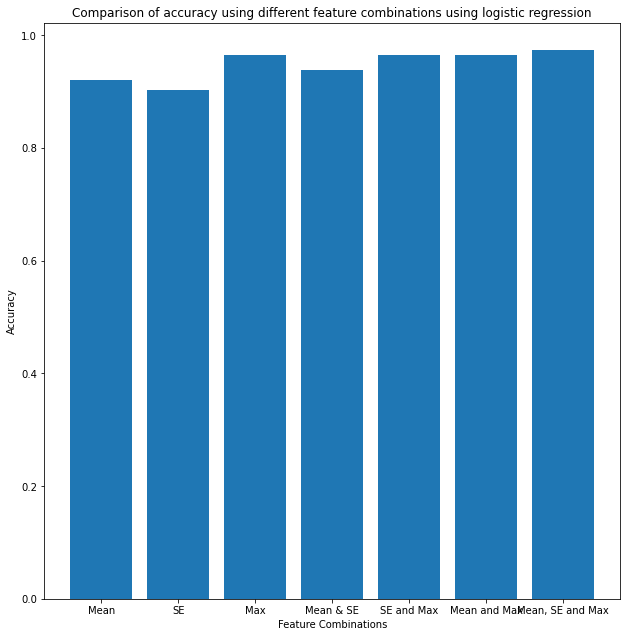

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
feature_comb = ['Mean', 'SE', 'Max', 'Mean & SE', 'SE and Max', 'Mean and Max', 'Mean, SE and Max']
accuracy = [0.921053, 0.903509,0.964912,0.938596,0.964912,0.964912,0.973684]
ax.bar(feature_comb,accuracy)
ax.set_xlabel('Feature Combinations')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of accuracy using different feature combinations using logistic regression')
plt.tight_layout()
plt.show()